## 2022-1 응용수학 중간고사

> 문제 정의

- Input: train2.csv 파일의 col → 전복 성별, 길이, 둘레, 키, 전체 무게, 껍질 제외 무게, 내장 무게, 껍질 무게, 전복 나이로 모델 학습
- Output: test2.csv 파일의 Target(나이) col 제거 후 나머지 feature 이용해 구축했던 모델로 전복의 나이를 예측한 값
- 문제를 한 문장으로 표현한다면: 전복과 관련한 정보를 담은 feature들을 이용하여 적절한 머신러닝 모델을 구축 후 전복의 나이를 예측하라.

---

> EDA

- [x] 데이터 col에 대한 분석
- [x] Min, Max, mean, ... 통계량을 그래프로 시각화 해보기
- [x] 결측치 체크 및 처리
- [x] Feature-Label 상관관계 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
train = pd.read_csv('./dataset/train2.csv')
test = pd.read_csv('./dataset/test2.csv')

train.rename(columns = {'Lenght':'Length'}, inplace = True) #csv 파일 오타 수정
test.rename(columns = {'Lenght': 'Length'}, inplace = True)

In [3]:
train.head()

,Unnamed: 0,id,Gender,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1154,1155,M,0.570,0.480,0.180,0.9395,0.3990,0.2000,0.2950,14
1,830,831,M,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975,9
2,1162,1163,F,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050,9
3,599,600,I,0.310,0.225,0.050,0.1445,0.0675,0.0385,0.0450,6
4,1058,1059,M,0.310,0.225,0.075,0.1295,0.0455,0.0335,0.0440,9


In [4]:
train = train.drop(columns=['id', 'Unnamed: 0'], axis = 1)

In [5]:
test.head()

,Unnamed: 0,id,Gender,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1213,1214,F,0.435,0.350,0.125,0.4590,0.1970,0.1145,0.145,9
1,537,538,M,0.525,0.395,0.165,0.7820,0.2850,0.1405,0.285,19
2,1216,1217,M,0.465,0.360,0.080,0.4880,0.1910,0.1250,0.155,11
3,692,693,I,0.380,0.300,0.090,0.2770,0.1655,0.0625,0.082,6
4,575,576,M,0.510,0.390,0.125,0.6565,0.2620,0.1835,0.175,10


In [6]:
test = test.drop(columns=['id', 'Unnamed: 0', 'Target'], axis = 1)

In [7]:
train.head()

,Gender,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.570,0.480,0.180,0.9395,0.3990,0.2000,0.2950,14
1,M,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975,9
2,F,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050,9
3,I,0.310,0.225,0.050,0.1445,0.0675,0.0385,0.0450,6
4,M,0.310,0.225,0.075,0.1295,0.0455,0.0335,0.0440,9


In [8]:
test.head()

,Gender,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,F,0.435,0.350,0.125,0.4590,0.1970,0.1145,0.145
1,M,0.525,0.395,0.165,0.7820,0.2850,0.1405,0.285
2,M,0.465,0.360,0.080,0.4880,0.1910,0.1250,0.155
3,I,0.380,0.300,0.090,0.2770,0.1655,0.0625,0.082
4,M,0.510,0.390,0.125,0.6565,0.2620,0.1835,0.175


---

#### 결측치 (없음)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

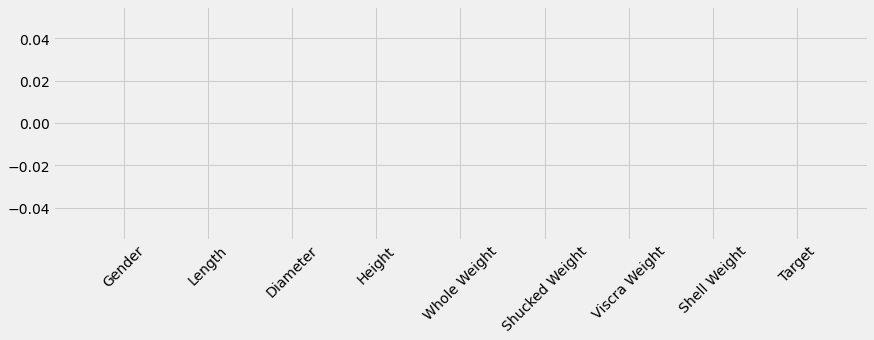

In [9]:
#그래프를 통해 train.csv에 결측치가 없는지 확인한다.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,4))
plt.bar(train.columns, train.isnull().sum())
plt.xticks(rotation=45) #글씨 45도 회전

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

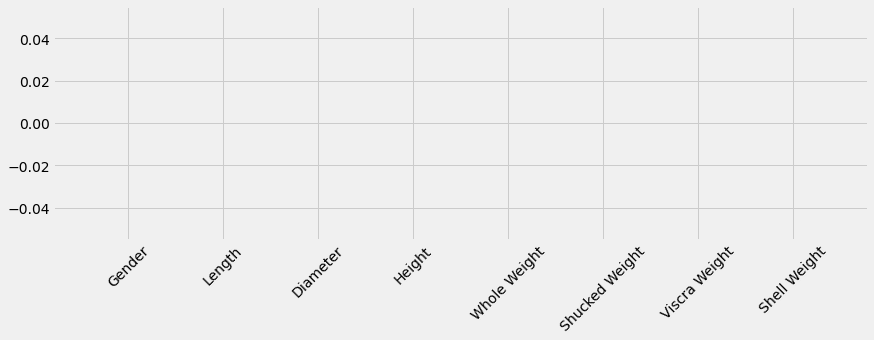

In [10]:
#그래프를 통해 test.csv에 결측치가 없는지 확인한다.
plt.figure(figsize=(13,4))
plt.bar(test.columns, test.isnull().sum())
plt.xticks(rotation=45) #글씨 45도 회전

#### 데이터 col에 대한 분석

(train2.csv, test2.csv)
- id : 샘플 아이디
- Gender : 전복 성별
- Lenght : 전복 길이
- Diameter : 전복 둘레
- Height : 전복 키 
- Whole : Weight : 전복 전체 무게
- Shucked Weight : 껍질을 제외한 무게
- Viscra Weight : 내장 무게
- Shell Weight : 껍질 무게
- Target : 전복 나이

In [11]:
print('-- train2.csv --'); print(train.dtypes); print('-- test2.csv --'); print(test.dtypes)

-- train2.csv --
Gender             object
Length            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscra Weight     float64
Shell Weight      float64
Target              int64
dtype: object
-- test2.csv --
Gender             object
Length            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscra Weight     float64
Shell Weight      float64
dtype: object


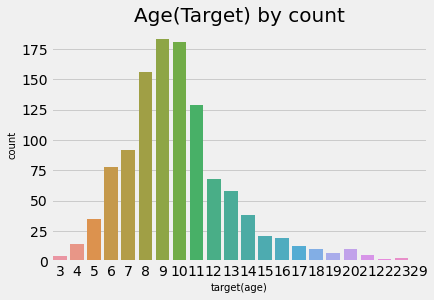

In [12]:
sns.countplot(x='Target' , data=train)
plt.title('Age(Target) by count', fontsize=20)
plt.xlabel('target(age)', fontsize=10)
plt.ylabel('count', fontsize=10)
plt.show()

<AxesSubplot:ylabel='Shell Weight'>

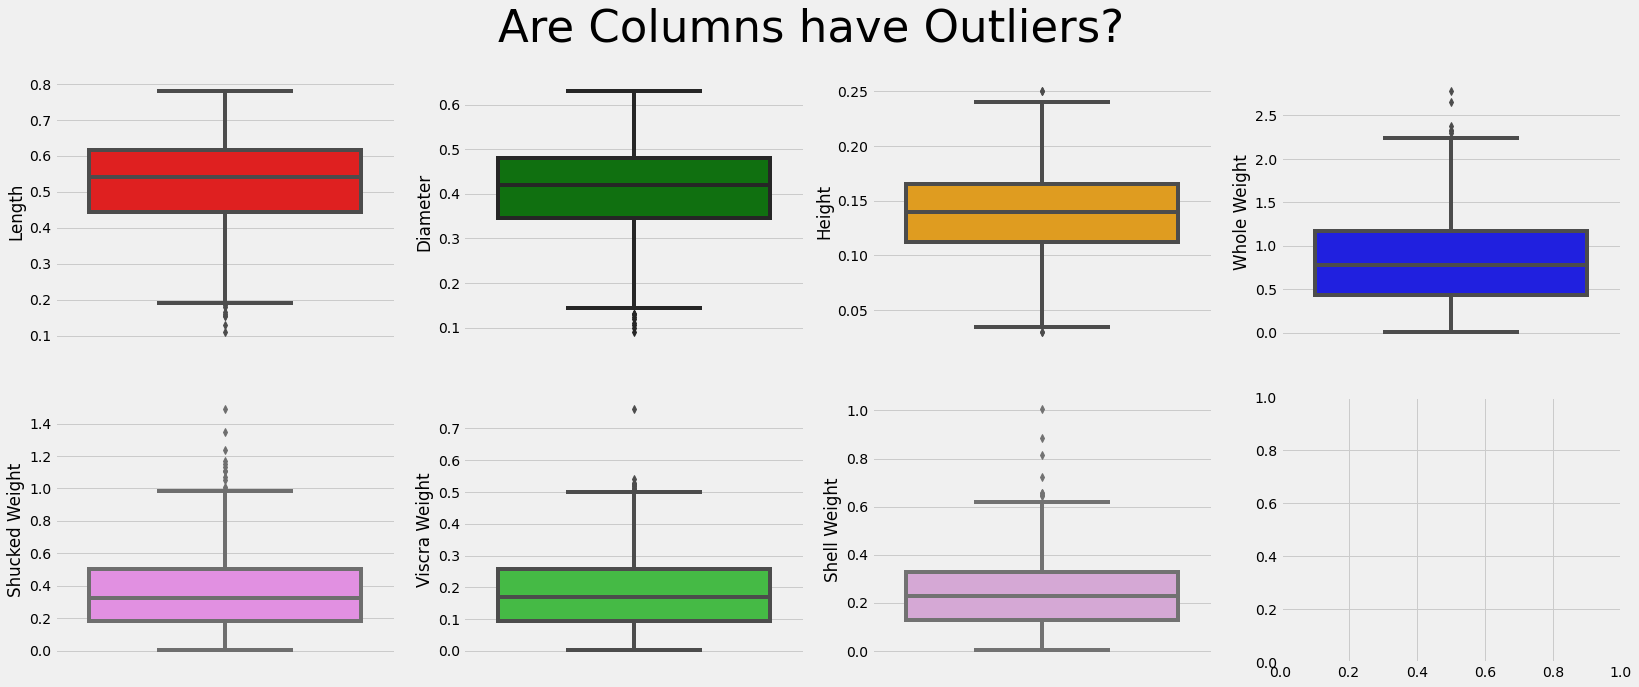

In [13]:
# 박스 플롯을 통해 각 column의 데이터를 살펴보았을 때, 심한 이상치는 보이지 않는다.
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows=2, ncols=4, figsize=(25,10))
fig.suptitle('Are Columns have Outliers?', fontsize=45)

sns.boxplot(ax=ax1, y='Length', data=train, color='red')
sns.boxplot(ax=ax2, y='Diameter', data=train, color='green')
sns.boxplot(ax=ax3, y='Height', data=train, color='orange')
sns.boxplot(ax=ax4, y='Whole Weight', data=train, color='blue')
sns.boxplot(ax=ax5, y='Shucked Weight', data=train, color ='violet')
sns.boxplot(ax=ax6, y='Viscra Weight', data=train, color = 'limegreen')
sns.boxplot(ax=ax7, y='Shell Weight', data=train, color = 'plum')

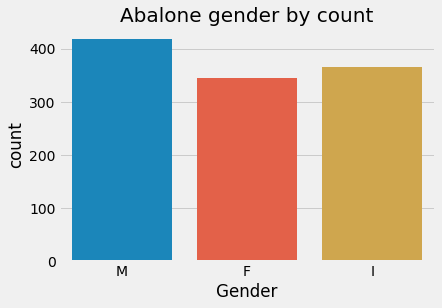

In [14]:
sns.countplot(x = 'Gender', data=train)
plt.title('Abalone gender by count', fontsize=20)
plt.show()

In [15]:
print(train['Gender'].unique())

['M' 'F' 'I']


In [16]:
train_corr = train.drop(columns=['Gender'],axis=1)
scaler= MinMaxScaler() 
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr28 = train_corr.corr(method= 'pearson')

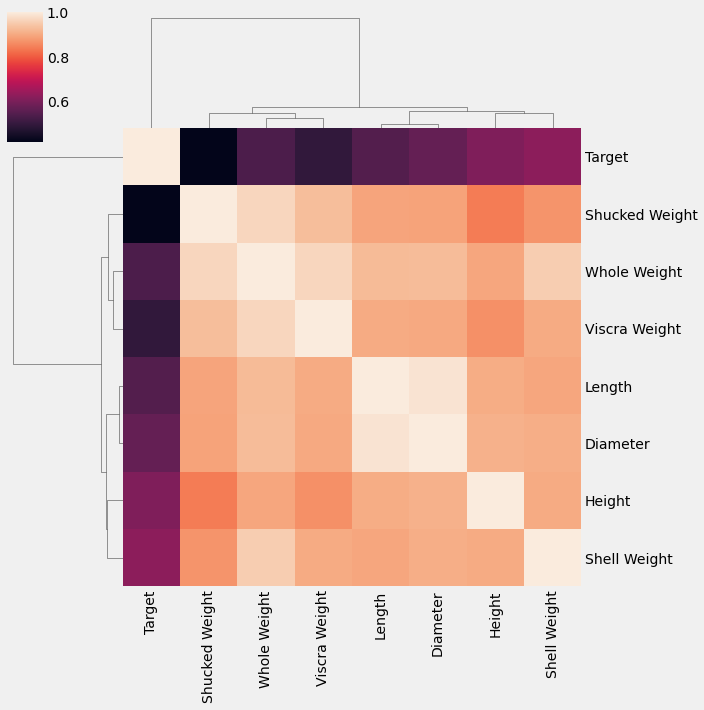

In [17]:
sns.clustermap(corr28)

#### Min, Max, mean, ... 통계량을 그래프로 시각화 해보기

In [18]:
train.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,0.522924,0.407036,0.139476,0.831996,0.358900,0.181458,0.239849,9.921029
std,0.121090,0.100372,0.039082,0.502113,0.225445,0.112655,0.142285,3.236664
min,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,0.445000,0.345000,0.112500,0.440250,0.180750,0.092500,0.127500,8.000000
50%,0.540000,0.420000,0.140000,0.777500,0.326500,0.168500,0.230500,10.000000
75%,0.615000,0.480000,0.165000,1.167000,0.503500,0.259000,0.330000,11.000000
max,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


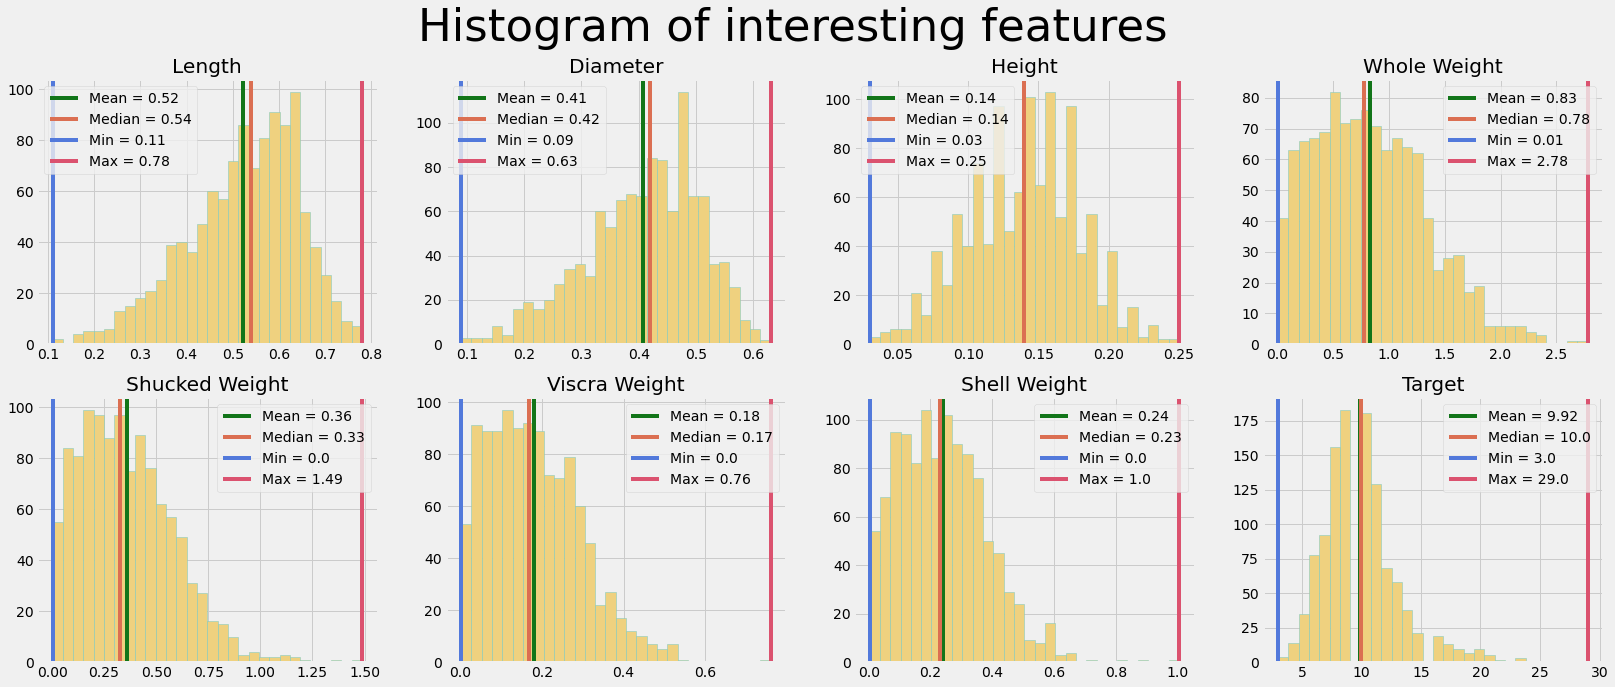

In [19]:
data_description = train.describe()
interest_coloumns = train.columns[1:]
fig, ax = plt.subplots(2, 4, figsize = (25, 10))
fig.suptitle('Histogram of interesting features', fontsize=45)
col_idx = 0
for i in range(2):
    for j in range(4):
        ax[i][j].hist(train[interest_coloumns[col_idx]], bins=30, color='#efd17f', edgecolor='#7bcabf')
        ax[i][j].set_title(interest_coloumns[col_idx])
        ax[i][j].axvline(data_description[interest_coloumns[col_idx]]['mean'], c='#127519', label = f"Mean = {round(data_description[interest_coloumns[col_idx]]['mean'], 2)}")
        ax[i][j].axvline(data_description[interest_coloumns[col_idx]]['50%'], c='#db6f52', label = f"Median = {round(data_description[interest_coloumns[col_idx]]['50%'], 2)}")
        ax[i][j].axvline(data_description[interest_coloumns[col_idx]]['min'], c ='#5279db', label = f"Min = {round(data_description[interest_coloumns[col_idx]]['min'], 2)}")
        ax[i][j].axvline(data_description[interest_coloumns[col_idx]]['max'], c = '#db526f', label = f"Max = {round(data_description[interest_coloumns[col_idx]]['max'], 2)}")
        ax[i][j].legend()
        col_idx += 1

#### feature - label('Target') 상관관계 분석

In [20]:
train_corr = train.drop(columns=['Gender'],axis=1)
scaler= MinMaxScaler() 
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr28 = train_corr.corr(method= 'pearson')

Text(0.5, 1.0, 'Correlation between features')

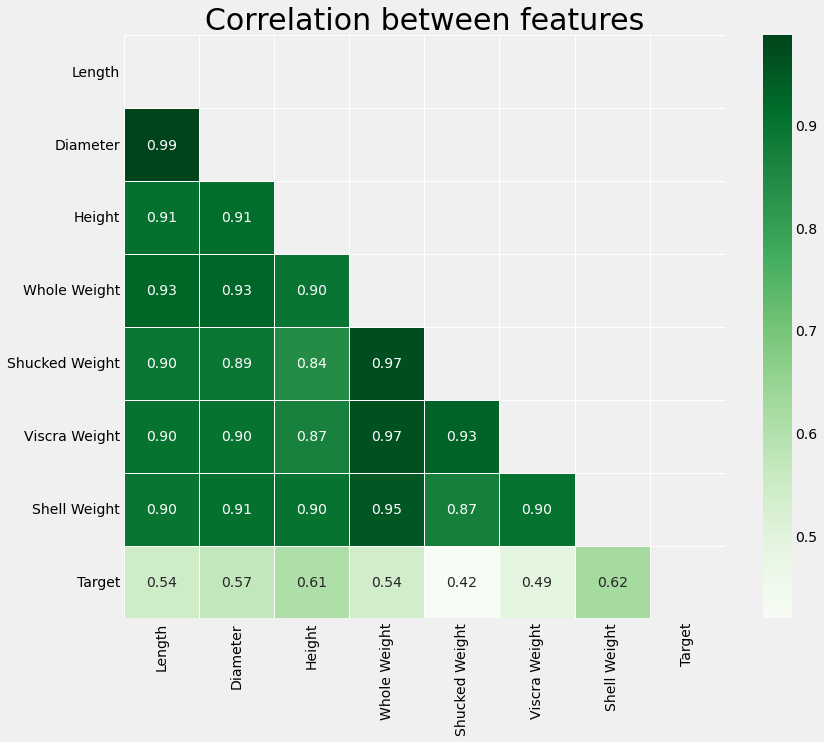

In [21]:
plt.figure(figsize=(12,10))
mask = np.zeros_like(corr28, dtype=np.bool_) # 대각선 기준 한쪽만 나타나게 설정
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data = corr28, annot=True, fmt = '.2f', linewidths=.5, mask=mask, cmap='Greens')
plt.title('Correlation between features', fontsize=30)
#Target(전복 나이)와 Shell Weight(껍질 무게)가 가장 높은 상관관계를 보임(0.62)

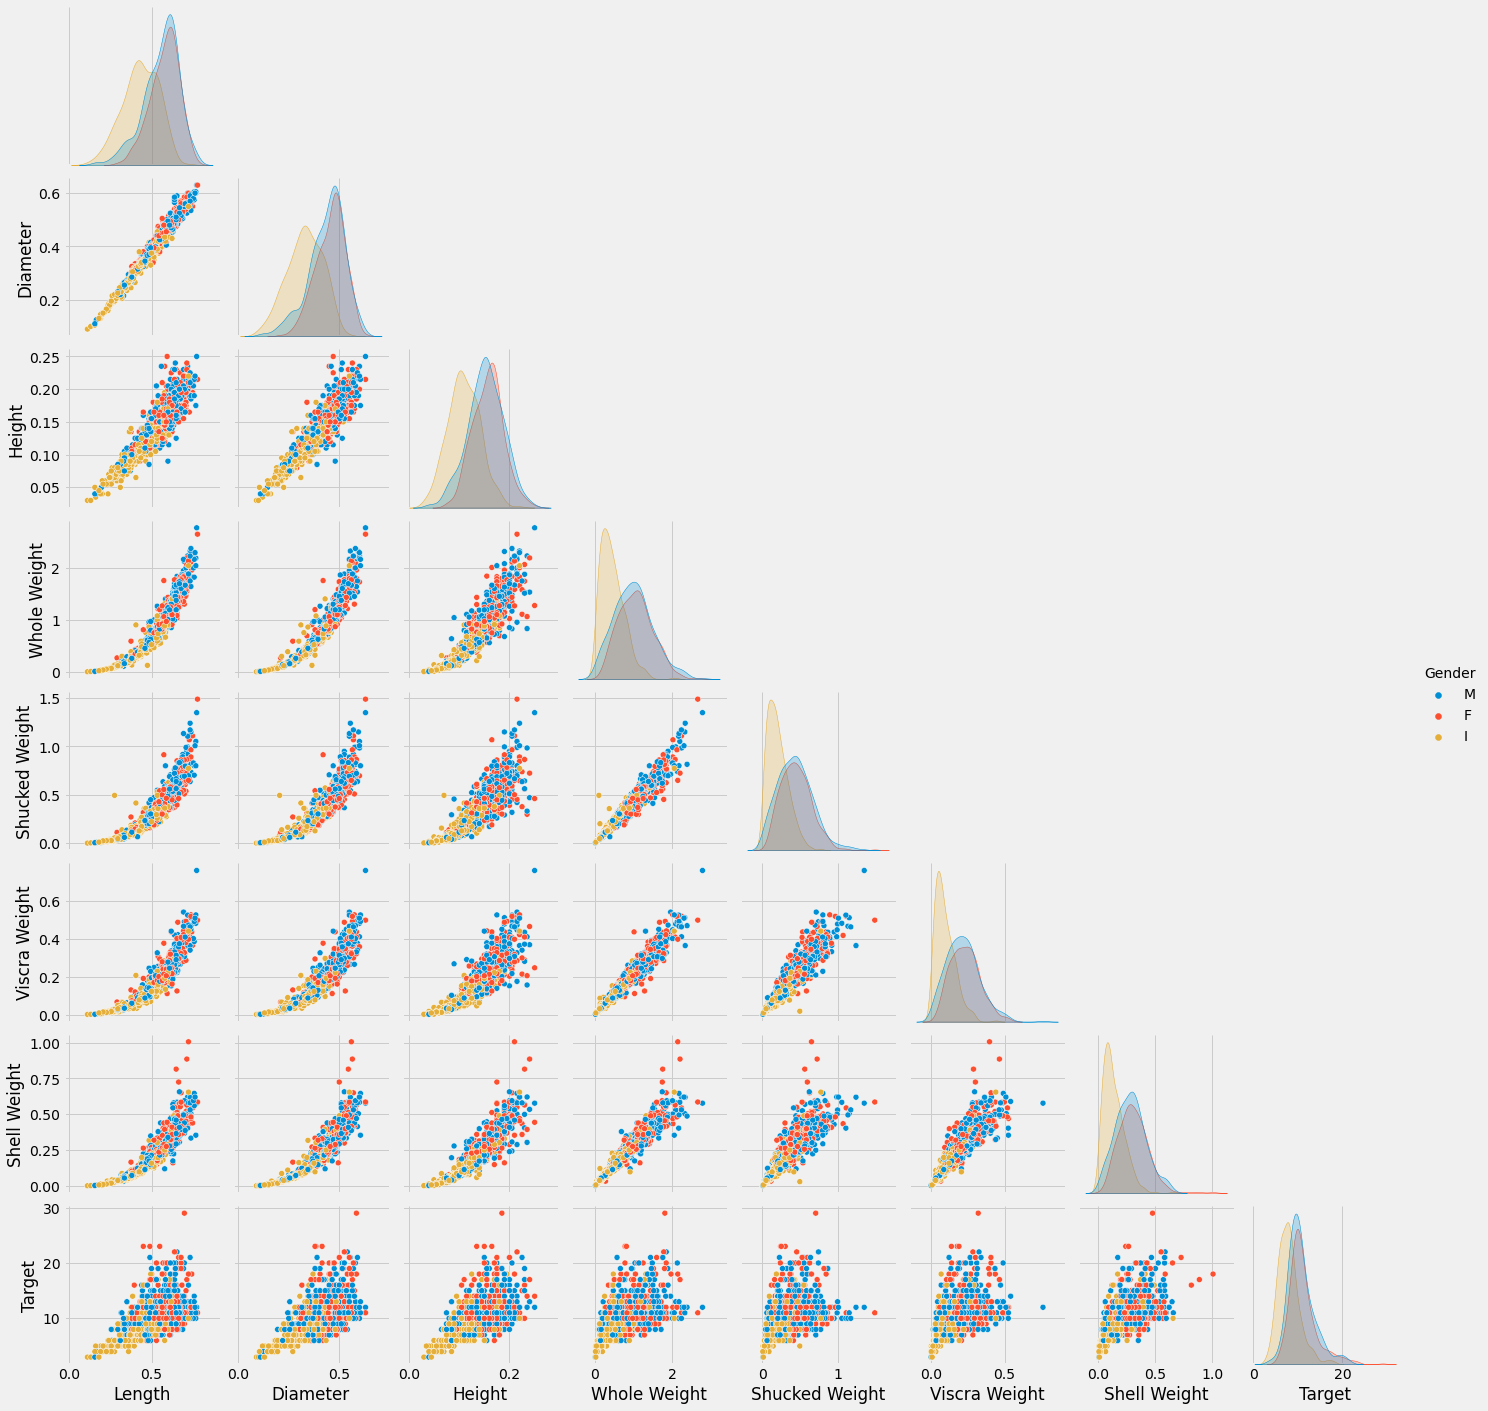

In [22]:
fig = sns.pairplot(train, hue='Gender', corner=True) #성별과 함께 확인 - corner: 대각선 기준 한 쪽만.

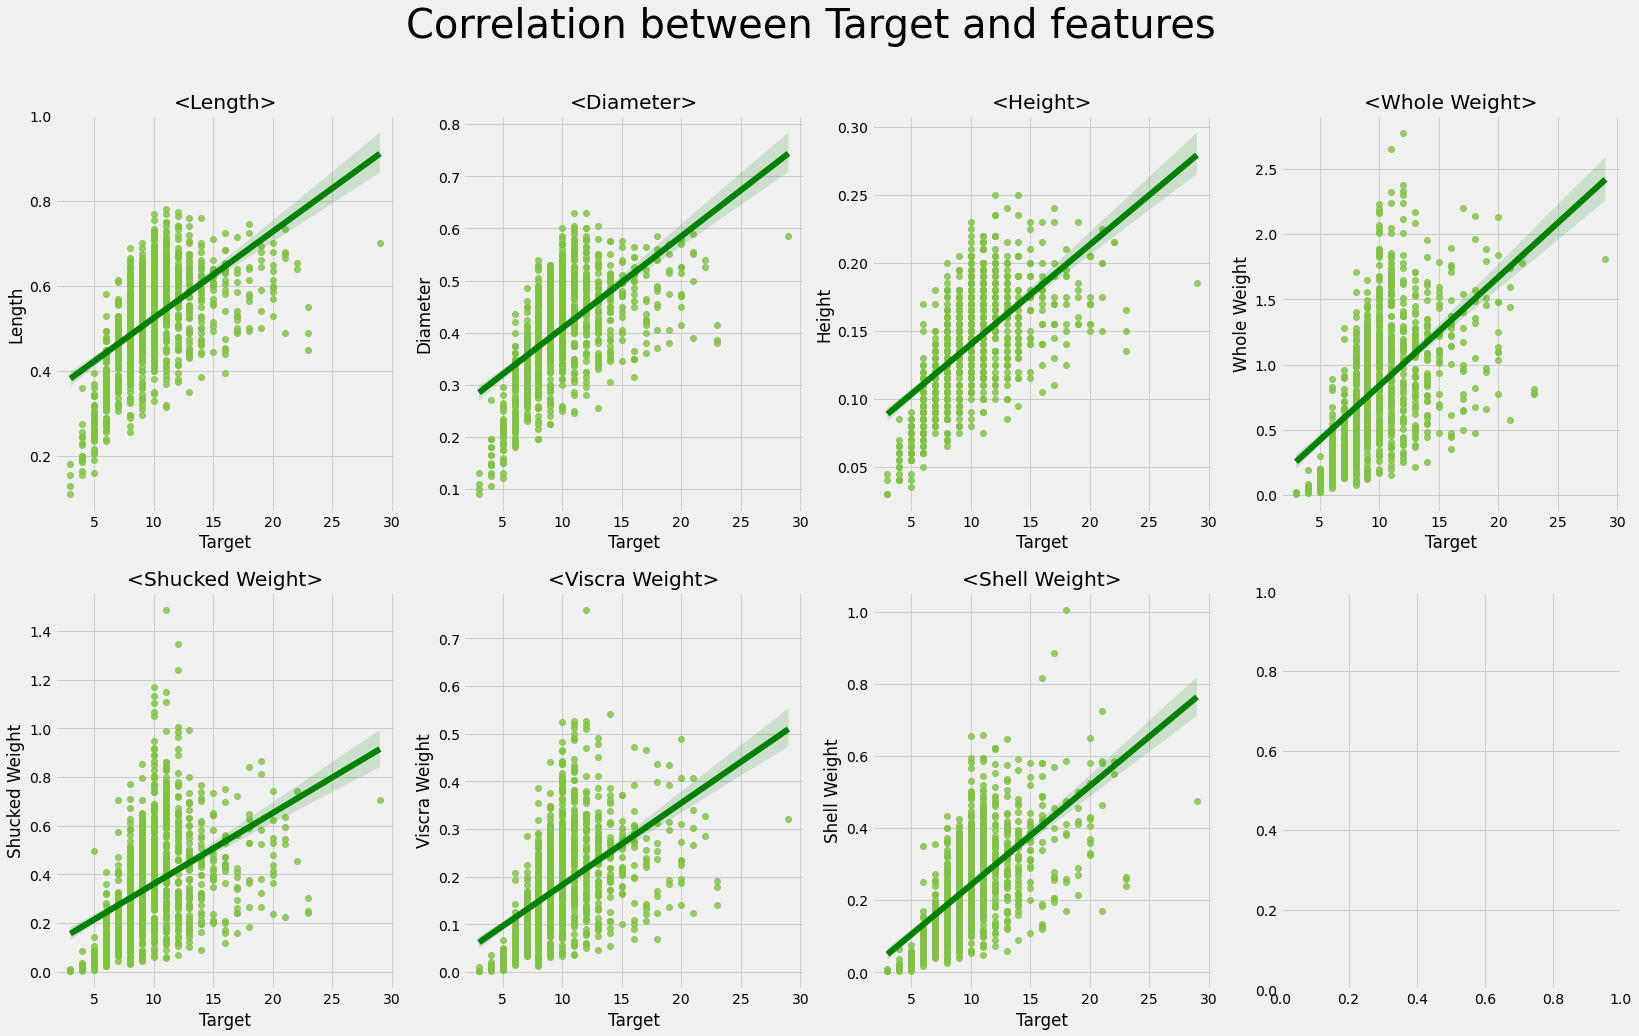

In [23]:
def graph_show(axx, yValue): # 모든 Feature, Target과 양의 상관관계 확인
    axx.set_title('<' + yValue + '>')
    sns.regplot(x='Target', y=yValue, data=train,  color='#81c147', line_kws=  {'color': 'green'} , ax = axx)

figure, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(nrows=2, ncols=4)
figure.suptitle('Correlation between Target and features', fontsize=40)
figure.set_size_inches(25,15)

for x in range(len(train.columns[1:8])):
    graph_show(eval(f'ax{x+1}'), train.columns[x+1])